In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Analisis de Datos

In [2]:
dataset=pd.read_csv('../python-ml-course/datasets/wine/winequality-red.csv',sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.shape

(1599, 12)

## Normalizar dataset

In [4]:
dataset_norm=(dataset-dataset.min())/(dataset.max()-dataset.min())
dataset_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Crear Cluster Jerarquico con Sklearn

In [5]:
from sklearn.cluster import AgglomerativeClustering

0       2
1       2
2       2
3       3
4       2
5       2
6       2
7       2
8       2
9       1
10      2
11      1
12      4
13      5
14      1
15      1
16      0
17      5
18      2
19      5
20      1
21      1
22      5
23      2
24      1
25      2
26      2
27      5
28      2
29      2
       ..
1569    4
1570    0
1571    4
1572    1
1573    4
1574    1
1575    0
1576    0
1577    4
1578    4
1579    4
1580    0
1581    4
1582    4
1583    1
1584    0
1585    0
1586    0
1587    4
1588    0
1589    1
1590    4
1591    4
1592    4
1593    4
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64


Text(0,0.5,'Numero de Vinos')

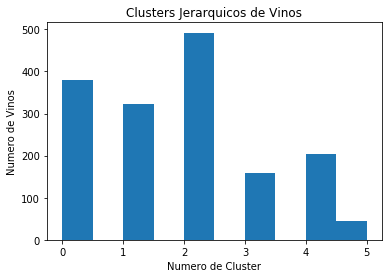

In [6]:
clust_h=AgglomerativeClustering(n_clusters=6,linkage='ward').fit(dataset_norm)
clust_h_groups=pd.Series(clust_h.labels_)
print(clust_h_groups)# ids de vinos con su respectivo cluster al que pertenecen
plt.hist(clust_h_groups)
plt.title('Clusters Jerarquicos de Vinos')
plt.xlabel('Numero de Cluster')
plt.ylabel('Numero de Vinos')

### Dendograma Truncado

In [7]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [8]:
clusters2=linkage(dataset_norm,method='ward')

<function matplotlib.pyplot.show(*args, **kw)>

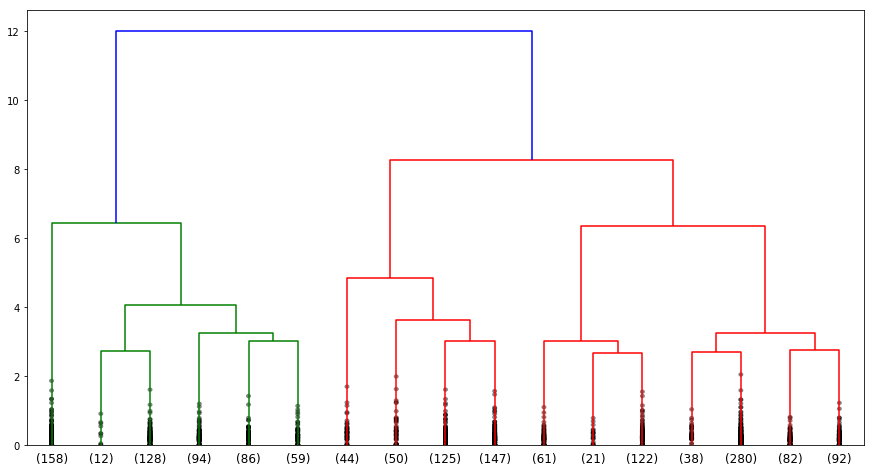

In [9]:
plt.figure(figsize=(15,8))
dendrogram(clusters2,truncate_mode='lastp',p=17,show_contracted=True)
plt.show

## Crear Cluster No Jerarquico (k-means) con Sklearn

In [10]:
from sklearn.cluster import KMeans
from sklearn import datasets

Text(0.5,1,'Cluster de Vinos k-means')

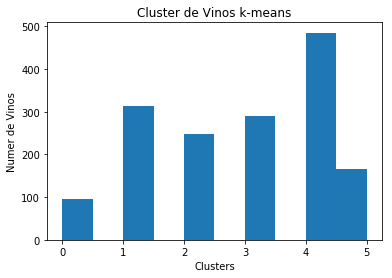

In [25]:
model=KMeans(n_clusters=6).fit(dataset_norm)
clust_k=pd.Series(model.labels_) #model.labels_ == model.predict(dataset_norm)
#print(model.labels_)
#print(model.predict(dataset_norm))
plt.hist(clust_k)
plt.xlabel('Clusters')
plt.ylabel('Numer de Vinos')
plt.title('Cluster de Vinos k-means')

In [12]:
dataset_norm['clust_h']=clust_h_groups
dataset_norm['clust_k']=clust_k
dataset_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


In [13]:
model.cluster_centers_ #caracteristicas de los centroides

array([[0.58242935, 0.20579706, 0.51197581, 0.13400354, 0.13117965,
        0.13908451, 0.09183005, 0.65596431, 0.33194691, 0.22249855,
        0.29185277, 0.54758065],
       [0.26288805, 0.36009866, 0.11775794, 0.09152125, 0.12257864,
        0.14479935, 0.10721297, 0.49071161, 0.48729846, 0.15502329,
        0.22069088, 0.44087302],
       [0.17374765, 0.32511002, 0.09027149, 0.09344201, 0.09552875,
        0.25205532, 0.1239787 , 0.32289154, 0.58039691, 0.18600807,
        0.49163476, 0.61266968],
       [0.36148029, 0.16073474, 0.41854545, 0.10438356, 0.10601912,
        0.15984635, 0.08353357, 0.41547991, 0.42073014, 0.23560152,
        0.47865734, 0.69090909],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821, 0.46666667],
       [0.31615802, 0.27819741, 0.30367601, 0.15109034, 0.12690933,
        0.37876793, 0.29641249, 0.53832553, 0.43665219, 0.1784655 ,
        0.21436217,

## Interpretacion Final

In [14]:
dataset_norm.groupby('clust_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.582429,0.205797,0.511976,0.134004,0.131180,0.139085,0.091830,0.655964,0.331947,0.222499,0.291853,0.547581,2.036290
1,0.262888,0.360099,0.117758,0.091521,0.122579,0.144799,0.107213,0.490712,0.487298,0.155023,0.220691,0.440873,2.023810
2,0.173748,0.325110,0.090271,0.093442,0.095529,0.252055,0.123979,0.322892,0.580397,0.186008,0.491635,0.612670,3.479638
3,0.361480,0.160735,0.418545,0.104384,0.106019,0.159846,0.083534,0.415480,0.420730,0.235602,0.478657,0.690909,0.138182
4,0.337168,0.292237,0.481333,0.075571,0.537896,0.209390,0.210718,0.514391,0.233596,0.590020,0.165128,0.466667,4.900000
5,0.316158,0.278197,0.303676,0.151090,0.126909,0.378768,0.296412,0.538326,0.436652,0.178465,0.214362,0.453583,1.049844
